<a href="https://colab.research.google.com/github/p-s-nayak/DL-NeuralNetwork-HUB/blob/main/03_linear_vs_non_linear_decission_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [15]:


# Set a clean seaborn style globally
sns.set_theme(style="whitegrid")
sns.set_context("notebook")

def plot_decision_boundary(model, X, y, ax, title):
    # Create grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Model predictions on grid
    Z = model.predict(grid).reshape(xx.shape)

    # Modern contour region
    ax.contourf(
        xx, yy, Z,
        cmap="coolwarm",
        alpha=0.25,
        levels=np.linspace(0, 1, 3)
    )

    # Soft contour boundary line
    ax.contour(
        xx, yy, Z,
        colors="black",
        linewidths=1,
        linestyles="--",
        levels=[0.5]
    )

    # Scatter points (cleaner)
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        palette="coolwarm",
        edgecolor="black",
        s=50,
        ax=ax,
        legend=False
    )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("x1", fontsize=12)
    ax.set_ylabel("x2", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.3)


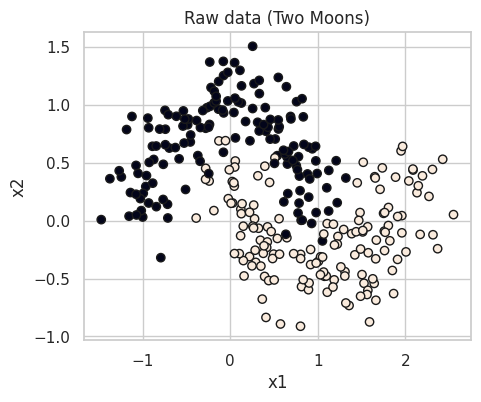

In [16]:
# Step 1 — Create & plot a non-linear dataset
# 1. Generate non-linearly separable data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Plot just the data
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("Raw data (Two Moons)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


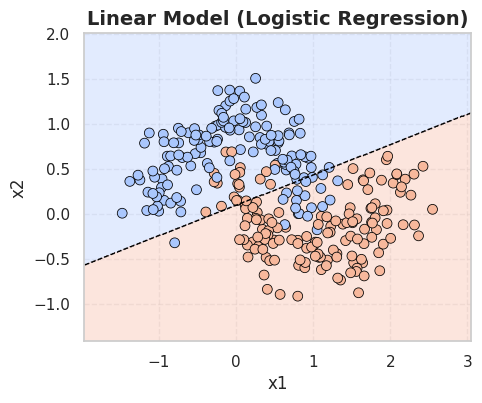

In [17]:
# Step 2 — Fit linear model (Logistic Regression)
# 2. Linear model: Logistic Regression
linear_clf = LogisticRegression()
linear_clf.fit(X, y)

# Plot linear decision boundary
fig, ax = plt.subplots(figsize=(5, 4))
plot_decision_boundary(linear_clf, X, y, ax, "Linear Model (Logistic Regression)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


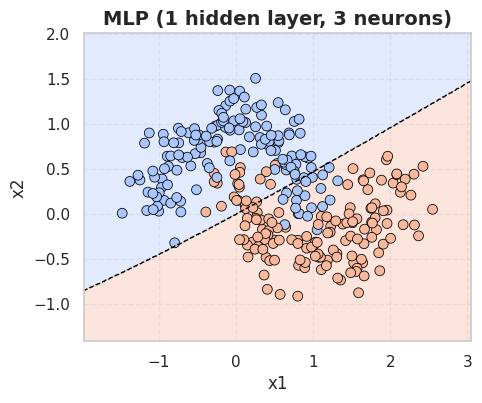

In [18]:
# Step 3 — Fit MLP with 1 hidden layer (non-linear)
# 3. Non-linear model: MLP (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(3,),
                    activation='tanh',
                    max_iter=500,
                    random_state=42)
mlp.fit(X, y)

# Plot MLP decision boundary
fig, ax = plt.subplots(figsize=(5, 4))
plot_decision_boundary(mlp, X, y, ax, "MLP (1 hidden layer, 3 neurons)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


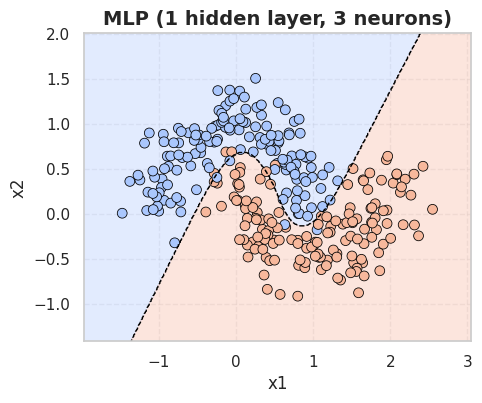

In [26]:
# Step 3 — Fit MLP with 1 hidden layer (non-linear)
# 3. Non-linear model: MLP (Neural Network)
mlp = make_pipeline(
    StandardScaler(),MLPClassifier(hidden_layer_sizes=(20,20),
                    activation='tanh',
                    max_iter=5000,
                    random_state=42))
mlp.fit(X, y)

# Plot MLP decision boundary
fig, ax = plt.subplots(figsize=(5, 4))
plot_decision_boundary(mlp, X, y, ax, "MLP (1 hidden layer, 3 neurons)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

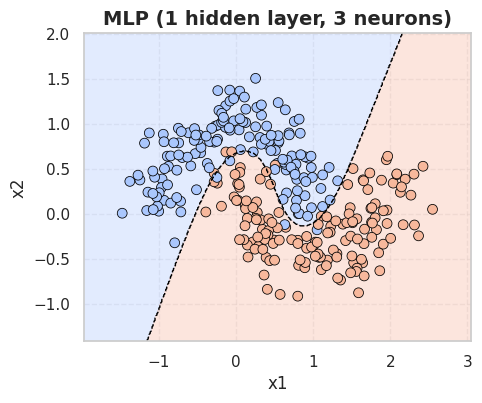

In [23]:
# Bigger hidden layer + scaling + more iterations
mlp = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(20,20),   # 20 neurons in hidden layer
        activation="tanh",          # non-linear
        max_iter=5000,
        random_state=0
    )
)
mlp.fit(X, y)

# Plot MLP decision boundary
fig, ax = plt.subplots(figsize=(5, 4))
plot_decision_boundary(mlp, X, y, ax, "MLP (1 hidden layer, 20 neurons)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()